In [1]:
# All  import statements needed for the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/unknown_labelled_data.csv')

In [4]:
df.drop(df.columns[0] , inplace=True , axis=1)

In [5]:
LabelColumns = ['Label_BENIGN', 'Label_DDoS','Label_DoS Hulk', 'Label_PortScan', 'Label_Unknown']
y = df[LabelColumns]

In [6]:
X = df.drop(LabelColumns , axis=1)

In [7]:
X = X.to_numpy().reshape(-1, 83,1)

In [8]:
X.shape , y.shape

((1851553, 83, 1), (1851553, 5))

In [9]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/models/unknown_labelled_cnn.hdf5')

In [10]:
type(model)

keras.engine.sequential.Sequential

In [11]:
predicted = model.predict(X)
predicted

57862/57862 [==============================] - 165s 3ms/step


array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       ...,
       [1.5570162e-16, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00],
       [7.5957640e-17, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00],
       [1.4564677e-16, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00]], dtype=float32)

In [12]:
predicted.shape , y.shape

((1851553, 5), (1851553, 5))

In [13]:
cols = y.columns

In [17]:
type(y) , type(predicted)

(numpy.ndarray, numpy.ndarray)

In [15]:
cols

Index(['Label_BENIGN', 'Label_DDoS', 'Label_DoS Hulk', 'Label_PortScan',
       'Label_Unknown'],
      dtype='object')

In [16]:
y = y.to_numpy()

## **Metrics of the Model**

In [18]:
#pred_test= model.predict(X)
scores2 = model.evaluate(X, y, verbose=1)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

57862/57862 [==============================] - 224s 4ms/step - loss: 0.0017 - accuracy: 0.9995
Accuracy on test data: 0.9995204210281372% 
 Error on test data: 0.00047957897186279297


In [19]:
model.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.0017256795>,
 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.9995204>}

In [20]:
predicted[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [21]:
y_prediction = np.argmax (predicted, axis = 1)

In [22]:
y_test=np.argmax(y , axis=1)

In [23]:
# Importing all necessary libraries
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_prediction)}")

Accuracy of the classifier is: 0.999520402602572


In [24]:
# Importing all necessary libraries
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, y_prediction,pos_label='positive',average='micro')}")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precision Score of the classifier is: 0.999520402602572


In [25]:
# Importing all necessary libraries
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, y_prediction,pos_label='positive',average='micro')}")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Recall Score of the classifier is: 0.999520402602572


In [26]:
# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, y_prediction,pos_label='positive',average='micro')}")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


F1 Score of the classifier is: 0.999520402602572


AUC for our classifier is: 0.7518345126052881


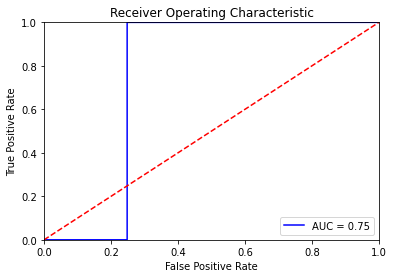

In [27]:
# Importing all necessary libraries
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, y_prediction, pos_label=1)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ROC _ CURVE IS NOT SUPPORTED FOR MULTICLASS LABELS :_(

In [28]:
#generating a report to extract the measure of interest using built-in sklearn function
report = classification_report(y_test, y_prediction,digits=3,output_dict = True)
report

{'0': {'precision': 0.9997978196937508,
  'recall': 0.9996327407033633,
  'f1-score': 0.9997152733838485,
  'support': 1296087},
 '1': {'precision': 1.0,
  'recall': 0.9999140806236184,
  'f1-score': 0.9999570384661951,
  'support': 128027},
 '2': {'precision': 0.998047414984794,
  'recall': 0.9998398774413281,
  'f1-score': 0.9989428421332538,
  'support': 231073},
 '3': {'precision': 0.999955941591138,
  'recall': 0.9996413515384132,
  'f1-score': 0.9997986218180674,
  'support': 158930},
 '4': {'precision': 0.995522308022308,
  'recall': 0.9917993375360615,
  'f1-score': 0.9936573355456833,
  'support': 37436},
 'accuracy': 0.999520402602572,
 'macro avg': {'precision': 0.9986646968583981,
  'recall': 0.9981654775685568,
  'f1-score': 0.9984142222694097,
  'support': 1851553},
 'weighted avg': {'precision': 0.9995204771218531,
  'recall': 0.999520402602572,
  'f1-score': 0.9995202619839965,
  'support': 1851553}}

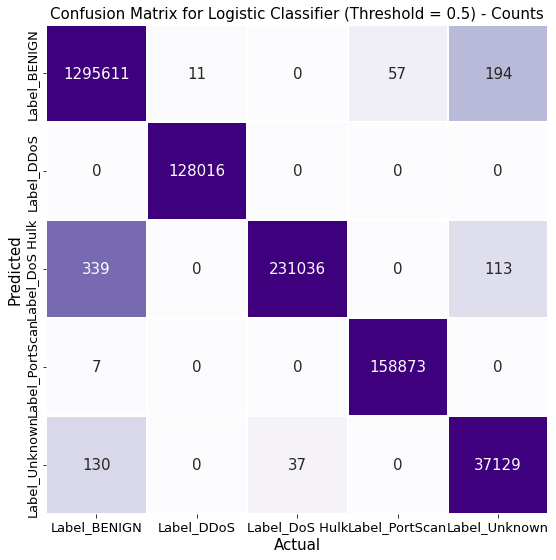

In [29]:
import sklearn
cm_logis = sklearn.metrics.confusion_matrix(y_test, y_prediction)
#put it into a dataframe
cm_logis_df = pd.DataFrame(cm_logis)

#plot CM
fig, ax = plt.subplots(figsize = (9,9))
sns.heatmap(pd.DataFrame(cm_logis_df.T), annot=True, annot_kws={"size": 15}, cmap="Purples", vmin=0, vmax=500, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=cols, yticklabels=cols)
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(cols, fontsize=13)
ax.set_yticklabels(cols, fontsize=13)
plt.title("Confusion Matrix for Logistic Classifier (Threshold = 0.5) - Counts", fontsize=15)
plt.show()